# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). This dataset is for one county Montgomery County, PA. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [54]:
## Import various libraries
import numpy as np
import pandas as pd 
import calendar
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

In [55]:
## Read in the csv file as a dataframe
data_df=pd.read_csv('https://raw.githubusercontent.com/abdulaziz2208/EDA-Projects/master/911.csv')

In [56]:
data_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Looking at the dataset, lat and lng columns do not seem to provide much information as this data is only for one county. The features that can help in our analysis is zip, title, timestamp.

Some basic information about the features in the dataset

In [57]:
## Info about the dataframe
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


The timestamp column is in object format. This needs to be converted to datetime.

In [58]:
data_df['timeStamp']=data_df['timeStamp'].apply(lambda x:pd.to_datetime(x))

In [59]:
df=data_df.copy()

## Few basic questions that can be asked are

**What are the top 5 zipcodes for 911 calls?**

In [60]:
## Top 5 zipcodes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships for 911 calls?**

In [61]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

## Creating new features

***If the title column is looked properly it can be seen that the data is in the form of Department name along with cause. The  Department name can be extracted from the column.***

In [62]:
df['Department']=df['title'].apply(lambda x:x.split(':')[0])

*Now, the count of Departments being called for a 911 call can be found out.*

In [63]:
df['Department'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Department, dtype: int64

A visual picture of the above information, this is a countplot of 911 calls by Department.

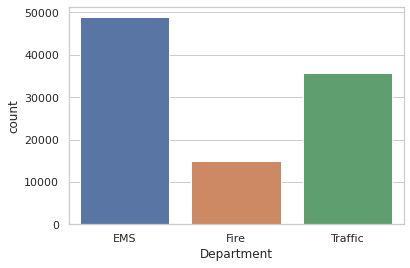

In [64]:
sns.countplot(x=df['Department'],data=df);

*The timestamp column can give us useful information on the hour of calls, the weekdays and can also provide insights into monthly call counts.*

In [65]:
df['Month']=df['timeStamp'].apply(lambda x:x.month)
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df['Date']=df['timeStamp'].apply(lambda x:x.date())
df['Weekday']=df['Date'].apply(lambda x:calendar.day_name[x.weekday()])

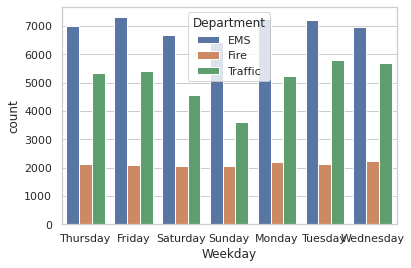

In [66]:
sns.countplot(x=df['Weekday'],data=df,hue=df['Department']);

The countplot shows the department wise count of calls across a week. On Sunday Traffic related calls are least. It can be due to Sunday being a holiday. 

***Monthwise analysis of calls***

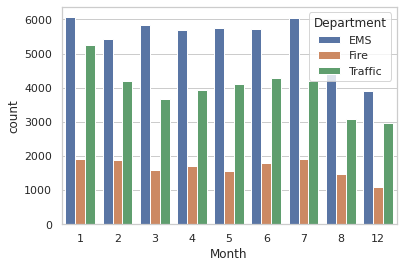

In [67]:
sns.countplot(x=df['Month'],data=df,hue=df['Department']);

*It canbe observed that data is missing for September, October and November*

In [68]:
pd.pivot_table(data=df,index='Month',columns='Weekday',aggfunc='count',values='Department')

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
1,1970,1727,2291,1960,1584,1973,1700
2,1581,1964,1441,1229,1596,1753,1903
3,1525,1535,1266,1102,1900,1884,1889
4,1958,1598,1734,1488,1601,1430,1517
5,1730,1779,1444,1424,1590,1918,1538
6,1649,1617,1388,1333,2065,1676,2058
7,2045,1692,1695,1672,1646,1670,1717
8,1310,1511,1099,1021,1230,1612,1295
12,1065,1257,978,907,1266,1234,1262


** create a plot of counts of 911 calls for dates given in the dataset.**

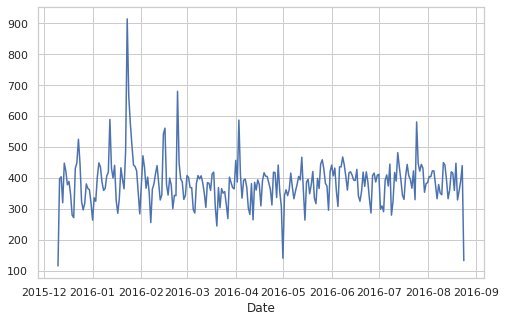

In [69]:
byDate=df.groupby(df['Date']).count()
byDate['Department'].plot(figsize=(8,5));

Looking at the plot, it can be said the number of calls on an average per day ranges between 300-450.

Similiar plot can be created for the three departments individually.

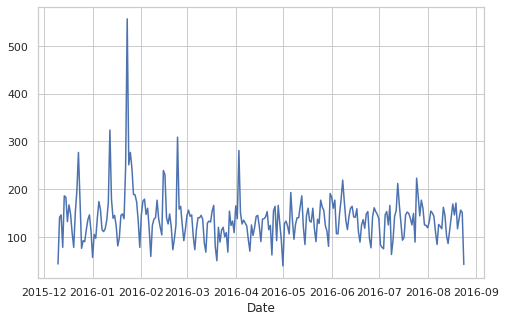

In [70]:
df[df['Department']=='Traffic'].groupby(df['Date']).count()['Department'].plot(figsize=(8,5))

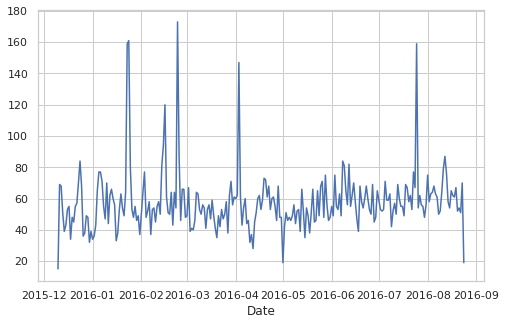

In [71]:
df[df['Department']=='Fire'].groupby(df['Date']).count()['Department'].plot(figsize=(8,5))

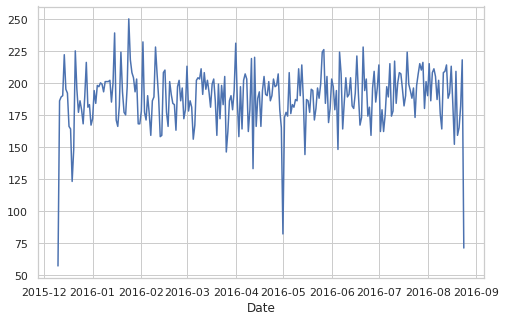

In [72]:
df[df['Department']=='EMS'].groupby(df['Date']).count()['Department'].plot(figsize=(8,5))

*Let us create a heatmap for the hourly counts across different weekdays*

In [73]:
df_unstack=df.groupby(['Weekday','Hour'])['Department'].count().unstack(level=-1)
df_unstack

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,840,838,887,917,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,800,789,903,872,904,867,990,1037,894,686,668,575,490,335


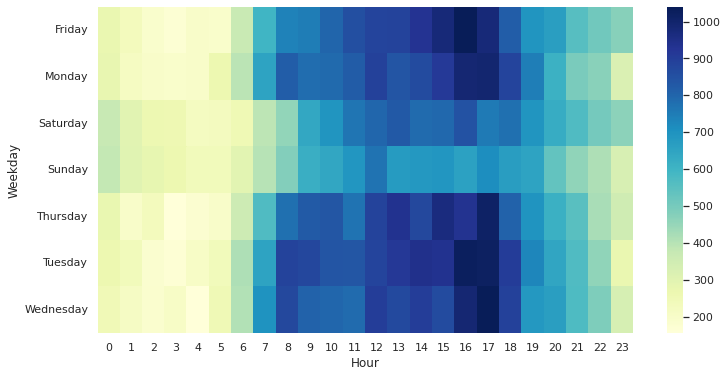

In [74]:
fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(df_unstack,cmap='YlGnBu');

# **Conclusions**

The data analysis can be useful to predict the number and type of call coming at different hours of the day. It can help the medical emergency teams to prepare themselves. More amount of data for different years can be taken to analyze cycles over years.